# Introduction

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    

## 1. Bank Marketing dataset:
It contains 41188 and 20 attributes.

1. import all the specific libraries that will be used.

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.stats as stats
import researchpy as rp
import sklearn
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE


Missing Values will be declared. This data set contains 'unknown' value as missing values

In [2]:
unknown_values = ['unknown']

Read the dataset from the csv file

In [4]:
old_dataset = pd.read_csv('bank-additional-full.csv', sep = ';', na_values = unknown_values)
old_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Check the total NULL values in the dataset

In [5]:
old_dataset.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Drop the NULL rows.

In [7]:
df = old_dataset.dropna()

Convert the 'duration' from seconds to minutes to have a better data visualisation.

In [8]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

<ipython-input-8-6821f7cd80eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].apply(lambda n:n/60).round(2)


Divide the 'age' into categories of Teenager, Adult and Elder to have a better understanding and insert them into the dataset as 'Age Group'

In [ ]:
category = pd.cut(df.age, bins = [0,20, 55, 100], labels = ['Teenage', 'Adult', 'Elder'])
df.insert(5, 'Age Group', category)

**DATA VISUALISATION AND CHI-SQUARE TEST**
1. Job

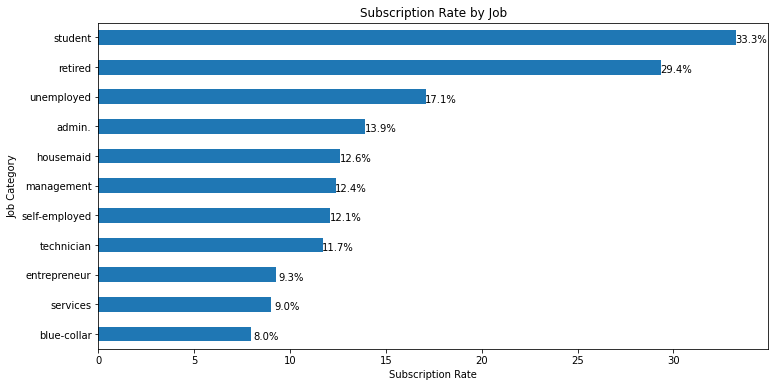

In [11]:
count_job = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job = count_job.transpose()
plot_job = count_job['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [15]:
crosstab, test_results, expected = rp.crosstab(df["job"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

y               
y                 no    yes     All
job                                
admin.         24.67   3.99   28.66
blue-collar    17.13   1.48   18.61
entrepreneur    3.24   0.33    3.57
housemaid       1.98   0.29    2.26
management      6.64   0.94    7.58
retired         2.82   1.17    3.99
self-employed   3.15   0.43    3.58
services        8.52   0.85    9.37
student         1.33   0.67    2.00
technician     15.85   2.10   17.95
unemployed      2.01   0.41    2.42
All            87.34  12.66  100.00

In [14]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,730.2239
1,p-value =,0.0000
2,Cramer's V =,0.1548


2. Age Group

In [ ]:
sns.countplot(df['Age Group'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["Age Group"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

3. Marital

In [ ]:
sns.countplot(df['marital'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["marital"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

4. Education

In [ ]:
df.groupby(['education','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["education"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

5. Default

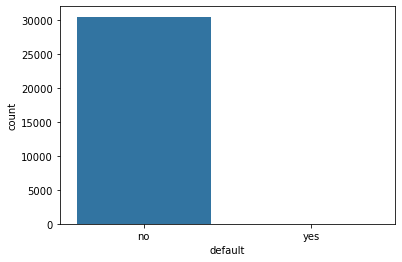

In [16]:
sns.countplot(df['default'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["default"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

6. Housing

In [ ]:
sns.countplot(df['housing'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["housing"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

7. Loan

In [ ]:
sns.countplot(df['loan'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["loan"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

8. Month

In [ ]:
df.groupby(['month','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["month"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

9. Day of Week

In [ ]:
df.groupby(['day_of_week','y']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["day_of_week"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results

10. Poutcome

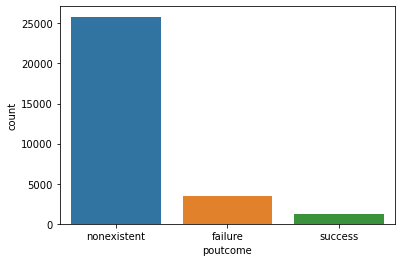

In [17]:
sns.countplot(df['poutcome'])

In [ ]:
crosstab, test_results, expected = rp.crosstab(df["poutcome"], df["y"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [ ]:
test_results